In [144]:
# Name: Sundar Swaminathan, Course: CIS-583, UMICH_ID: 29200876

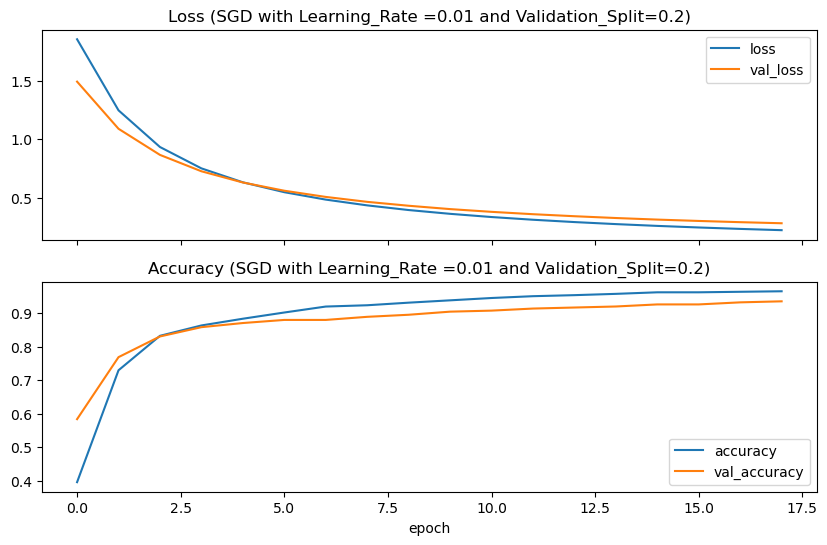

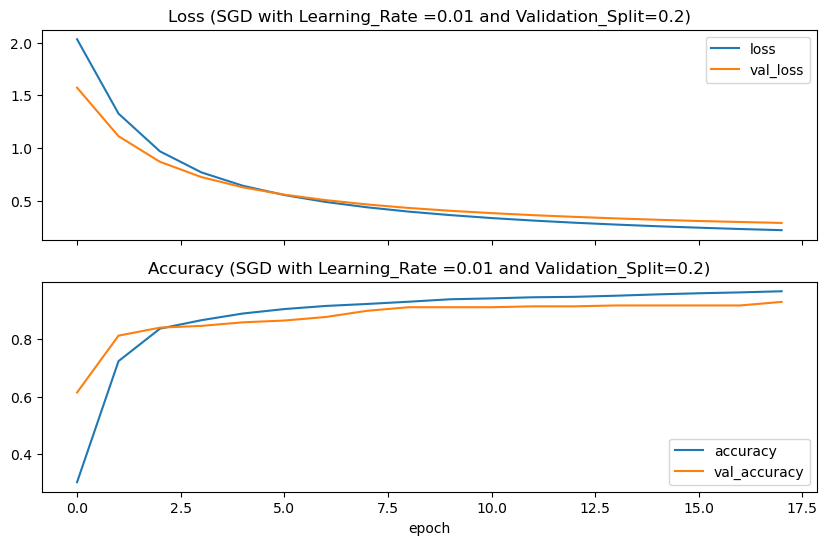

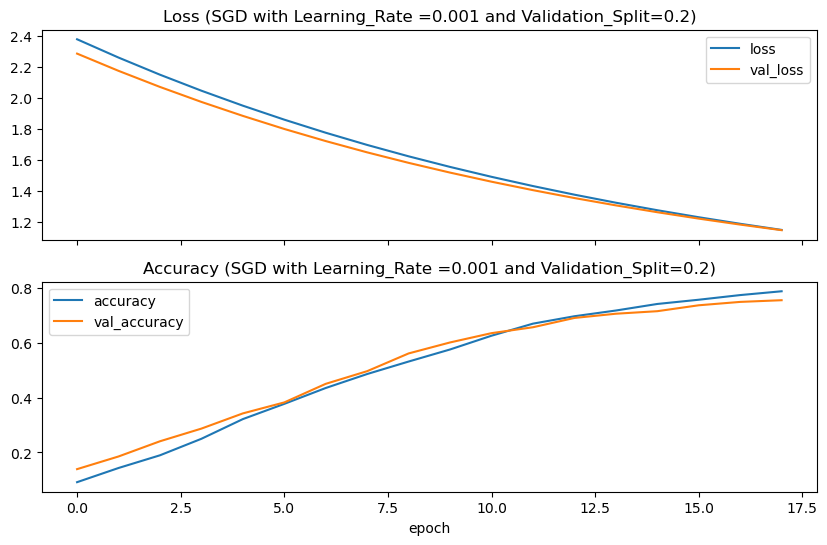

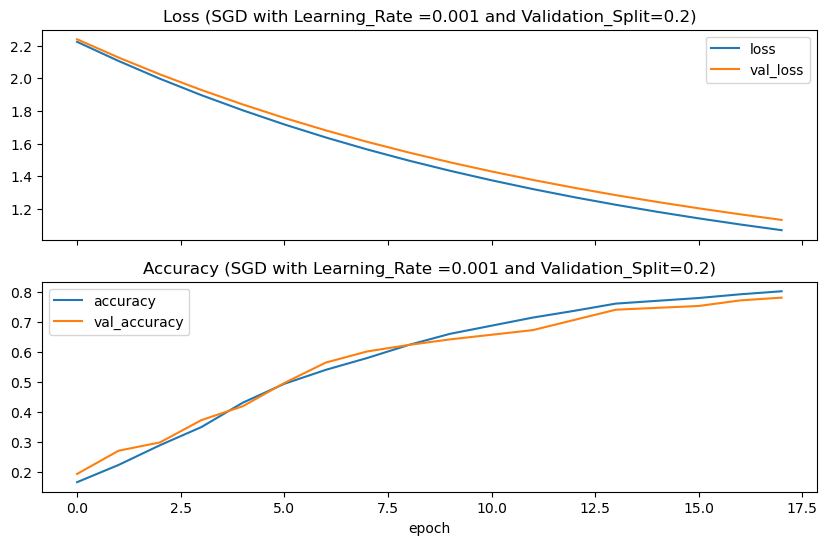

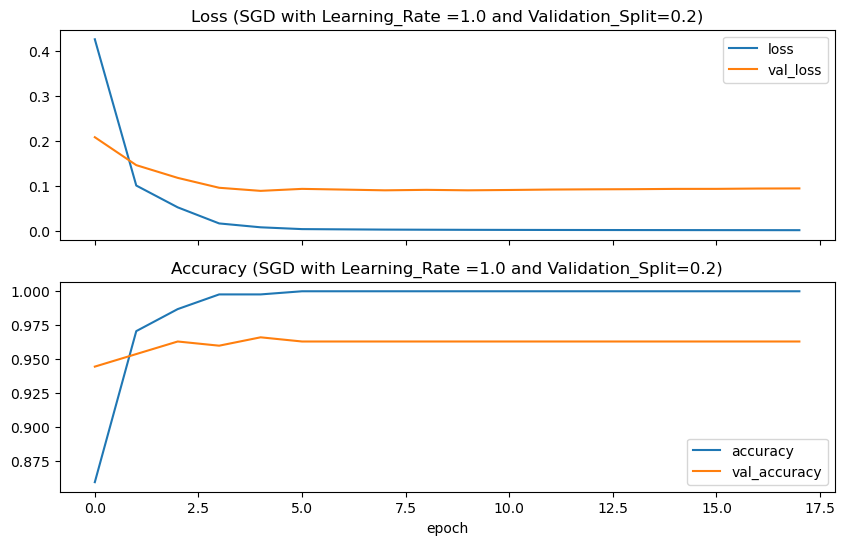

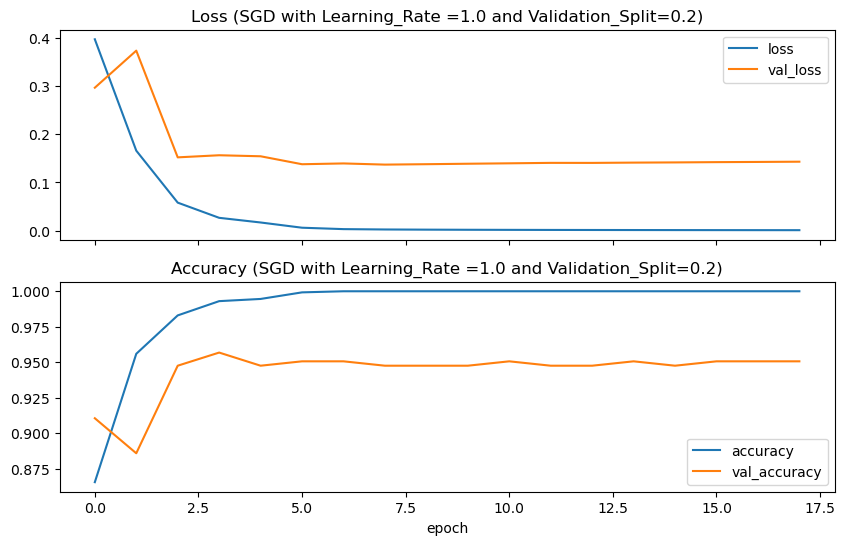

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

import datetime

import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


digits = load_digits()
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='float32')
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"tensorboard_logs/{timestamp}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

def build_model(optimizer):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(100, activation="tanh"))
    model.add(Dense(100, activation="tanh"))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def train_and_plot(optimizer, lr, vs, title):
    model = build_model(optimizer)
    history = model.fit(X_train, Y_train, validation_split=vs, epochs=18, batch_size=32, verbose=0, callbacks=[tensorboard_callback])
    history_df = pd.DataFrame(history.history)
    history_df["epoch"] = history.epoch
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))
    history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, title=f"Loss ({title})")
    history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, title=f"Accuracy ({title})")
    plt.show()

for learninig_rate in [0.01, 0.001, 1.0]:
    for validation_split in [0.1, 0.2]:
        train_and_plot(optimizers.SGD(learning_rate=learninig_rate), learninig_rate, vs, f"SGD with Learning_Rate ={learninig_rate} and Validation_Split={vs}")

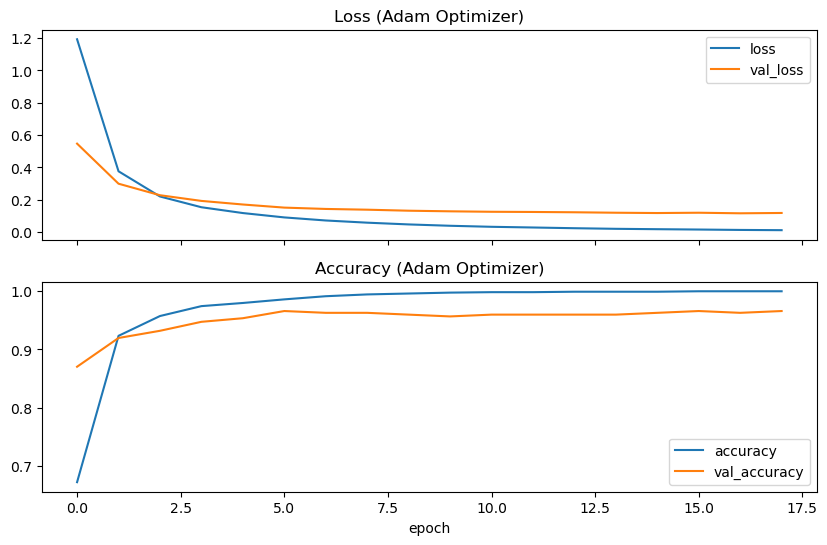

In [146]:
train_and_plot(optimizers.Adam(), 0.1, 0.2, "Adam Optimizer")

In [147]:
%tensorboard --logdir tensorboard_logs

Reusing TensorBoard on port 6007 (pid 75979), started 1 day, 3:17:03 ago. (Use '!kill 75979' to kill it.)